### Customer Feedback Analysis for Hotels in Kenya :  Booking.com


This project aims to provide AfriDusky with a clear understanding of customer preferences and actionable recommendations for success in Kenya’s dynamic hospitality sector.

### Introduction

In the competitive hospitality industry, customer satisfaction is key for success. This Project focuses om analyzing hotel reviews to uncover insights into what guests value the most and identify possible areas for improvement.

For AfrikDusky Travel agency a new company in the kenyan market, understanding customer prefences and expectations is important for establishing a loyal customer base.

The research questions guiding this project are:

 1. Do guests from specific countries or regions express higher or lower satisfaction?
 2. How does sentiment vary by room type ?
 3. Does Sentiment Vary Based on Hotel Rating?
 4. Which Aspect of Hotel Service Has the Highest and Lowest Average Ratings?
 5. What Are the Most Common Complaints Among Guests?
 6. Which Hotel Features Receive the Most Positive Feedback?


Exploring these questions will provide actionable insights that could guide AfrikDusky's operations, helping it tailor its service to meet the kenyan market demands, and position itself as a leader in customer satisfaction.

### Expected Benefits

1. Enhance Guest Satisfaction
    - Identify positive guest satisfaction drivers or factors.
2. Informed Marketing Strategy
    - Use the most praosed features to create compelling messages/ads to attract potential customers
3. Build Brand loyalty
    - Positioning AfrikDusky as a customer-focused travel agency that listens to customer feedback will streghthen its reputation

#### Who Benefits from this project?

This analysis directly benefits AfriDusky Tours and Travel Agency as it enters the Kenyan market and our stakeholders i.e :
- **Hotel Managers** : Gain actionable insights to enhance operations and customer satisfaction.
- **Customers** : Enjoy improved services tailored to their preferences and expectations.
- **Strategic Partners**: Hotels and suppliers collaborating with AfriDusky can use these insights to refine their offerings.

### Data Sourcing & Extraction

In [2]:
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait as wait
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import random
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [37]:
#Get Chrome driver
driver = webdriver.Chrome()
driver.implicitly_wait(10)

In [6]:
link = "https://www.booking.com/searchresults.html?ss=Kenya&ssne=Kenya&ssne_untouched=Kenya&label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&lang=en-us&sb=1&src_elem=sb&src=index&dest_id=109&dest_type=country&group_adults=1&no_rooms=1&group_children=0"
driver.get(link)
print(link)

https://www.booking.com/searchresults.html?ss=Kenya&ssne=Kenya&ssne_untouched=Kenya&label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&lang=en-us&sb=1&src_elem=sb&src=index&dest_id=109&dest_type=country&group_adults=1&no_rooms=1&group_children=0


In [38]:
# click load more button

try:
    total_properties = 0
    maximum_clicks = 250
    count_clicks = 0
    while count_clicks < maximum_clicks:
        try:
            # Locate the button 
            #button = driver.find_element(By.XPATH, "//button[.//span[text()='Load more results']]")
            button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//button[.//span[text()='Load more results']]"))
            )
                # Scroll into view if necessary (optional)
            driver.execute_script("arguments[0].scrollIntoView(true);", button)

            # Click the button
            button.click()
            count_clicks += 1
            print(f"Load More Button clicked successfully! {count_clicks}")
            
            total_properties += random.randint(40,42)
            time.sleep(random.uniform(4,5)) # Random delay click
            
        except Exception as e:
                print(f"No more 'Load more results' button or an error occurred.")
                break

    print(f"Finished loading properties. Total estimated properties: {total_properties}")
except Exception as e:
    print(f"An error occurred: {e}")

No more 'Load more results' button or an error occurred.
Finished loading properties. Total estimated properties: 0


In [ ]:
# Collecting the attractions on the first page, you don't need pagination for this exam
# start collecting data from here (~ 50 attractions)

hotel_dic = {"name":[],"rating":[],"rating_label":[],"no_reviews":[],"location":[], "hotel_page":[]}
        
# Extraction part (Ensure this part is properly indented as part of the for loop)
# Find all elements that match the XPath
hotel_names = driver.find_elements("xpath","//*[@id='bodyconstraint-inner']/div[2]/div/div[2]/div[3]/div[2]/div[2]/div[3]/div/div[1]/div[2]/div/div/div[1]/div/div[1]/div/h3/a/div[1]")
overall_ratings = driver.find_elements("xpath","//*[@id='bodyconstraint-inner']/div[2]/div/div[2]/div[3]/div[2]/div[2]/div[3]/div/div[1]/div[2]/div/div/div[2]/div/div[1]/a/span/div/div[1]/div")
rating_labels = driver.find_elements("xpath","//*[@id='bodyconstraint-inner']/div[2]/div/div[2]/div[3]/div[2]/div[2]/div[3]/div/div[1]/div[2]/div/div/div[2]/div/div[1]/a/span/div/div[2]/div[1]")
locations = driver.find_elements("xpath","//*[@id='bodyconstraint-inner']/div[2]/div/div[2]/div[3]/div[2]/div[2]/div[3]/div/div[1]/div[2]/div/div/div[1]/div/div[2]/div/a/span/span[1]")
hotel_pages= driver.find_elements("xpath","//div[@data-testid='property-card']//a[@data-testid='title-link']")
#//*[@id="bodyconstraint-inner"]/div[2]/div/div[2]/div[3]/div[2]/div[2]/div[3]/div/div[1]/div[2]/div/div/div[2]/div/div[1]/a/span/div/div[2]/div[2]
no_reviews= driver.find_elements("xpath","//*[@id='bodyconstraint-inner']/div[2]/div/div[2]/div[3]/div[2]/div[2]/div[3]/div/div[1]/div[2]/div/div/div[2]/div/div[1]/a/span/div/div[2]/div[2]")


# Iterate over each element to get its text content
for hotel_name,overall_rating,rating_label,location,hotel_page,no_review in zip(hotel_names,overall_ratings,rating_labels,locations,hotel_pages,no_reviews):
    hotel_dic["name"].append(hotel_name.get_attribute('textContent').strip())
    hotel_dic["rating"].append(overall_rating.get_attribute('textContent').strip())
    hotel_dic["rating_label"].append(rating_label.get_attribute('textContent').strip())
    hotel_dic["no_reviews"].append(no_review.get_attribute('textContent').strip())
    hotel_dic["location"].append(location.get_attribute('textContent').strip())
    hotel_dic["hotel_page"].append(hotel_page.get_attribute('href').strip())

    print(hotel_page.get_attribute('textContent').strip(), "Done!")

In [46]:
# convert the data to Pandas dataframe
hotels_df = pd.DataFrame(hotel_dic)
hotels_df.head(50)

,name,rating,rating_label,location,hotel_page
0,Argyle Grand Hotel Nairobi Airport,Scored 8.7,Excellent,Nairobi,https://www.booking.com/hotel/ke/argyle-grand-...
1,The Hills View,Scored 8.4,Very Good,"Kilimani, Nairobi",https://www.booking.com/hotel/ke/the-hills-vie...
2,Kongoni House,Scored 9.1,Wonderful,Nairobi,https://www.booking.com/hotel/ke/kongoni-house...
3,Lake Elementaita Mountain Lodge,Scored 8.4,Very Good,Nakuru,https://www.booking.com/hotel/ke/lake-elementa...
4,Elite Luxury Apartments Kilimani - An Oasis of...,Scored 9.5,Exceptional,"Kilimani, Nairobi",https://www.booking.com/hotel/ke/elite-luxury-...
5,Jumbo Club Watamu,Scored 8.6,Excellent,Watamu,https://www.booking.com/hotel/ke/jumbo-watamu-...
6,MILANY HOMES - near JKIA airport and SGR train...,Scored 8.7,Excellent,Nairobi,https://www.booking.com/hotel/ke/milany-homes....
7,Luxury Skynest with Gym and Pool in Westlands,Scored 9.6,Exceptional,"Westlands, Nairobi",https://www.booking.com/hotel/ke/skynest-luxur...
8,The Boma Nairobi,Scored 8.0,Very Good,Nairobi,https://www.booking.com/hotel/ke/the-boma-nair...
9,The Ivory Suites,Scored 8.2,Very Good,Mombasa,https://www.booking.com/hotel/ke/the-ivory-sui...


In [43]:
# shape
hotels_df.shape


(891, 5)

In [44]:
# check the dataframe info
print(hotels_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          891 non-null    object
 1   rating        891 non-null    object
 2   rating_label  891 non-null    object
 3   location      891 non-null    object
 4   hotel_page    891 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB
None


### Data Cleaning


In [54]:
# remove "scored" in ratings
hotels_df['rating'] = hotels_df['rating'].str.replace('Scored ','')


In [ ]:
hotels_df['no_reviews'] = hotels_df['no_reviews'].str.replace('reviews','')

In [58]:
hotels_df['rating'] = hotels_df['rating'].astype(float).astype(int)

In [61]:
hotels_df.to_csv('hotel_data.csv', index=False)


In [62]:
# average rating
avg_rating = hotels_df['rating'].mean()
print(f"Average rating: {avg_rating:.2f}")

Average rating: 7.83


### Fetch Reviews

In [67]:
# display full values for each column
pd.set_option('display.max_colwidth', None)

hotels_df["hotel_page"][:4]

891

In [5]:
hotel_df = pd.read_csv('hotel_data.csv')

In [6]:
hotel_df

,name,rating,rating_label,location,hotel_page
0,Argyle Grand Hotel Nairobi Airport,8,Excellent,Nairobi,https://www.booking.com/hotel/ke/argyle-grand-...
1,The Hills View,8,Very Good,"Kilimani, Nairobi",https://www.booking.com/hotel/ke/the-hills-vie...
2,Kongoni House,9,Wonderful,Nairobi,https://www.booking.com/hotel/ke/kongoni-house...
3,Lake Elementaita Mountain Lodge,8,Very Good,Nakuru,https://www.booking.com/hotel/ke/lake-elementa...
4,Elite Luxury Apartments Kilimani - An Oasis of...,9,Exceptional,"Kilimani, Nairobi",https://www.booking.com/hotel/ke/elite-luxury-...
...,...,...,...,...,...
886,Greenparkstaycation,9,Wonderful,Athi River,https://www.booking.com/hotel/ke/greenparkstay...
887,TANISHIA APARTMENTS,8,Very Good,Mombasa,https://www.booking.com/hotel/ke/tanishia-apar...
888,Sweetwaters Serena Camp,7,Good,Nanyuki,https://www.booking.com/hotel/ke/sweetwaters-s...
889,supreme living two bedroom apartment with brea...,7,Good,Nairobi,https://www.booking.com/hotel/ke/supreme-livin...


In [ ]:
review_dic = {
    'hotel_pages': [],
    'guest_names': [],
    'guest_countries': [],
    'room_types': [],
    'ratings': [],
    'review_dates': [],
    'review_main_texts': [],
    'review_like_texts': [],
    'review_dislike_texts': [],
}

for page in hotel_df["hotel_page"]:
    print(f"Scraping hotel page: {page}")
    driver.get(page)
    
    try:
        # Click "Read all reviews" button
        read_reviews_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//*[@id='reviews-tab-trigger']/span/div/span"))
        )
        driver.execute_script("arguments[0].scrollIntoView(true);", read_reviews_button)
        read_reviews_button.click()
        print(f"Clicked 'Read all reviews'")
        page_count = 1
        while True:
            try:
                # Locate current pagination and buttons
                pagination_list = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CLASS_NAME, "ef2dbaeb17"))
                )
                pagination_buttons = pagination_list.find_elements(By.TAG_NAME, "button")
                

                # Extract reviews for the current page
                guest_names = driver.find_elements(By.XPATH, "//*[@id='reviewCardsSection']/div[1]/div/div/div[2]/div/div[1]/div/div[1]/div/div[2]/div[1]")
                guest_countries = driver.find_elements(By.XPATH, "//*[@id='reviewCardsSection']/div[1]/div/div/div[2]/div/div[1]/div/div[1]/div/div[2]/div[2]/span")
                room_types = driver.find_elements(By.XPATH, "//*[@id='reviewCardsSection']/div[1]/div/div/div[2]/div/div[1]/div/div[2]/ul/li[1]/div/div/span")
                ratings = driver.find_elements(By.XPATH, "//*[@id='basiclayout']/div[1]/div[1]/div[1]/div[4]/div/div[1]/div[2]/div/div/div/div/div/div[2]/div/div[1]/div[1]/div[1]/div[1]/div")
                review_dates = driver.find_elements(By.XPATH, "//*[@id='reviewCardsSection']/div[1]/div/div/div[2]/div/div[2]/div/div/div[1]/div[1]/div/div/span")
                review_main_texts = driver.find_elements(By.XPATH, "//*[@id='reviewCardsSection']/div[1]/div[10]/div/div[2]/div/div[2]/div/div/div[1]/div[1]/h3")
                review_like_texts = driver.find_elements(By.XPATH, "//*[@id='reviewCardsSection']/div[1]/div/div/div[2]/div/div[2]/div/div/div[2]/div/div[3]/div/span")
                review_dislike_texts = driver.find_elements(By.XPATH, "//*[@id='reviewCardsSection']/div[1]/div/div/div[2]/div/div[2]/div/div/div[3]/div/div[3]/div/span")

                # Add extracted details to the dictionary
                for guest_name, guest_country, room_type, rating, review_date, review_main_text, review_like_text, review_dislike_text in zip(
                    guest_names, guest_countries, room_types, ratings, review_dates, review_main_texts, review_like_texts, review_dislike_texts
                ):
                    #print("guest_name",guest_name.get_attribute('textContent').strip())
                    review_dic["hotel_pages"].append(page)
                    review_dic["guest_names"].append(guest_name.get_attribute('textContent').strip())
                    review_dic["guest_countries"].append(guest_country.get_attribute('textContent').strip())
                    review_dic["room_types"].append(room_type.get_attribute('textContent').strip())
                    review_dic["ratings"].append(rating.get_attribute('textContent').strip())
                    review_dic["review_dates"].append(review_date.get_attribute('textContent').strip())
                    review_dic["review_main_texts"].append(review_main_text.get_attribute('textContent').strip())
                    review_dic["review_like_texts"].append(review_like_text.get_attribute('textContent').strip())
                    review_dic["review_dislike_texts"].append(review_dislike_text.get_attribute('textContent').strip())

                print(f"Collected {len(guest_names)} reviews on page {page_count}.")
    
                # get the last element (next page arrow)
                next_page_button = pagination_buttons[-1]
                
                if next_page_button:
                    
                    driver.execute_script("arguments[0].scrollIntoView(true);", next_page_button)
                    WebDriverWait(driver, 10).until(EC.element_to_be_clickable(next_page_button))
                    #print(f"next page click {next_page_button}")
                    next_page_button.click()
                    print(f"Click to next page {page_count + 1}")
                    page_count += 1
                    time.sleep(5)  # Wait to load
                else:
                    print("No more pages. End of pagination.")
                    break

            except Exception as e:
                print(f"Error collecting reviews or navigating pages: {e}")
                break

    except Exception as e:
        print(f"Error on hotel page {page}: {e}")




In [ ]:
# Save data to a DataFrame or CSV
import pandas as pd
reviews_df = pd.DataFrame(review_dic)
reviews_df.to_csv("hotel_reviews.csv", index=False)



## Data Cleaning

In [5]:
reviews_data = pd.read_csv("hotel_reviews.csv")

In [6]:
reviews_data.head()

,hotel_pages,guest_names,guest_countries,room_types,ratings,review_dates,review_main_texts,review_like_texts,review_dislike_texts
0,https://www.booking.com/hotel/ke/argyle-grand-...,Tony,Kenya,Superior Double Room,Scored 8.7,"Reviewed: November 15, 2024",Exceptional,"Excellent services, quality room",Airport Pick up Challenges
1,https://www.booking.com/hotel/ke/argyle-grand-...,Christopher,United Kingdom,Superior Double Room,Scored 8.7,"Reviewed: November 2, 2024",Good value for your money,Staff are so outstanding. Second time staying ...,Nothing.
2,https://www.booking.com/hotel/ke/argyle-grand-...,Annelisa,South Africa,Superior Double Room,Scored 8.7,"Reviewed: October 7, 2024",One of the best and clean!!,Restaurants,Concierge service not open 24.7
3,https://www.booking.com/hotel/ke/argyle-grand-...,Edward,United Arab Emirates,Superior Double Room,Scored 8.7,"Reviewed: September 26, 2024",Wonderful,Cleanness and service was good,The restaurants are only at the ground level n...
4,https://www.booking.com/hotel/ke/argyle-grand-...,Ntefeleng,Lesotho,Superior Double Room,Scored 8.7,"Reviewed: September 10, 2024",Gorgeous hotel,the welcome message on the TV screen with my n...,Airconditioner couldn't warm the room at night...


In [7]:
reviews_data.shape

(883, 9)

In [8]:
reviews_data

,hotel_pages,guest_names,guest_countries,room_types,ratings,review_dates,review_main_texts,review_like_texts,review_dislike_texts
0,https://www.booking.com/hotel/ke/argyle-grand-...,Tony,Kenya,Superior Double Room,Scored 8.7,"Reviewed: November 15, 2024",Exceptional,"Excellent services, quality room",Airport Pick up Challenges
1,https://www.booking.com/hotel/ke/argyle-grand-...,Christopher,United Kingdom,Superior Double Room,Scored 8.7,"Reviewed: November 2, 2024",Good value for your money,Staff are so outstanding. Second time staying ...,Nothing.
2,https://www.booking.com/hotel/ke/argyle-grand-...,Annelisa,South Africa,Superior Double Room,Scored 8.7,"Reviewed: October 7, 2024",One of the best and clean!!,Restaurants,Concierge service not open 24.7
3,https://www.booking.com/hotel/ke/argyle-grand-...,Edward,United Arab Emirates,Superior Double Room,Scored 8.7,"Reviewed: September 26, 2024",Wonderful,Cleanness and service was good,The restaurants are only at the ground level n...
4,https://www.booking.com/hotel/ke/argyle-grand-...,Ntefeleng,Lesotho,Superior Double Room,Scored 8.7,"Reviewed: September 10, 2024",Gorgeous hotel,the welcome message on the TV screen with my n...,Airconditioner couldn't warm the room at night...
...,...,...,...,...,...,...,...,...,...
878,https://www.booking.com/hotel/ke/royal-court.h...,Siddaraje,Tanzania,Standard Double Room,Scored 6.4,"Reviewed: October 2, 2022",Very Good,Need good maintenance \nEverything Including l...,Breakfast choice only TEA Bread and Jam no Butter
879,https://www.booking.com/hotel/ke/methodist-gue...,Jeff,United States of America,Double or Twin Room,Scored 6.9,"Reviewed: September 19, 2023",Very Good,Restful. Enjoyed meals at poolside restaurant....,The washrooms were small\nHot water took long\...
880,https://www.booking.com/hotel/ke/ravic-homes-n...,Glory,Kenya,Three-Bedroom Apartment,Scored 8.8,"Reviewed: September 9, 2024","Good location, nice apartment but would have h...","Good location, great host, spottless clean and...",I liked everything.
881,https://www.booking.com/hotel/ke/amarossi-apar...,Fortune,Rwanda,Studio Apartment,Scored 7.4,"Reviewed: June 27, 2023",Quite good thanks,"Excellent service, I had a pleasant stay.",Nothing.


In [9]:

reviews_data['ratings'] = reviews_data['ratings'].str.replace('Scored', '')

In [10]:
reviews_data['ratings'].astype(str)

0       8.7
1       8.7
2       8.7
3       8.7
4       8.7
       ... 
878     6.4
879     6.9
880     8.8
881     7.4
882     8.7
Name: ratings, Length: 883, dtype: object

In [11]:

reviews_data['review_dates'] = reviews_data['review_dates'].str.replace('Reviewed:', '')

In [12]:
# Convert review_dates to datetime
reviews_data["review_dates"] = pd.to_datetime(reviews_data["review_dates"])

In [13]:
# Combine reviews into a single column
reviews_data["combined_reviews"] = reviews_data["review_main_texts"] + " " + reviews_data["review_like_texts"] + " " + reviews_data["review_dislike_texts"]




In [14]:
reviews_data

,hotel_pages,guest_names,guest_countries,room_types,ratings,review_dates,review_main_texts,review_like_texts,review_dislike_texts,combined_reviews
0,https://www.booking.com/hotel/ke/argyle-grand-...,Tony,Kenya,Superior Double Room,8.7,2024-11-15,Exceptional,"Excellent services, quality room",Airport Pick up Challenges,"Exceptional Excellent services, quality room A..."
1,https://www.booking.com/hotel/ke/argyle-grand-...,Christopher,United Kingdom,Superior Double Room,8.7,2024-11-02,Good value for your money,Staff are so outstanding. Second time staying ...,Nothing.,Good value for your money Staff are so outstan...
2,https://www.booking.com/hotel/ke/argyle-grand-...,Annelisa,South Africa,Superior Double Room,8.7,2024-10-07,One of the best and clean!!,Restaurants,Concierge service not open 24.7,One of the best and clean!! Restaurants Concie...
3,https://www.booking.com/hotel/ke/argyle-grand-...,Edward,United Arab Emirates,Superior Double Room,8.7,2024-09-26,Wonderful,Cleanness and service was good,The restaurants are only at the ground level n...,Wonderful Cleanness and service was good The r...
4,https://www.booking.com/hotel/ke/argyle-grand-...,Ntefeleng,Lesotho,Superior Double Room,8.7,2024-09-10,Gorgeous hotel,the welcome message on the TV screen with my n...,Airconditioner couldn't warm the room at night...,Gorgeous hotel the welcome message on the TV s...
...,...,...,...,...,...,...,...,...,...,...
878,https://www.booking.com/hotel/ke/royal-court.h...,Siddaraje,Tanzania,Standard Double Room,6.4,2022-10-02,Very Good,Need good maintenance \nEverything Including l...,Breakfast choice only TEA Bread and Jam no Butter,Very Good Need good maintenance \nEverything I...
879,https://www.booking.com/hotel/ke/methodist-gue...,Jeff,United States of America,Double or Twin Room,6.9,2023-09-19,Very Good,Restful. Enjoyed meals at poolside restaurant....,The washrooms were small\nHot water took long\...,Very Good Restful. Enjoyed meals at poolside r...
880,https://www.booking.com/hotel/ke/ravic-homes-n...,Glory,Kenya,Three-Bedroom Apartment,8.8,2024-09-09,"Good location, nice apartment but would have h...","Good location, great host, spottless clean and...",I liked everything.,"Good location, nice apartment but would have h..."
881,https://www.booking.com/hotel/ke/amarossi-apar...,Fortune,Rwanda,Studio Apartment,7.4,2023-06-27,Quite good thanks,"Excellent service, I had a pleasant stay.",Nothing.,"Quite good thanks Excellent service, I had a p..."


In [15]:
# Text Cleaning Pipeline
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
    
def clean_pipeline(text):
    
    # Step 1: Lower all the cases in 'text'
    # text = text.lower()
    
    # remove special characters, keeping words and numbers
    clean_text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Step 2: Tokenizing sentences into words
    token_list = word_tokenize(clean_text)
    
    # Step 3: Removing stopwords and meaningless words
    
    # Load the default NLTK stopwords set for English
    stop_words = set(stopwords.words('english'))

    # # Define your own set of additional stopwords to add
    # additional_stopwords = {}

    # # Combine the default set with your additional stopwords
    # stop_words = stop_words.union(additional_stopwords)
    
    # Save the non-stopwords in a list
    filtered_tokens = [word for word in token_list if word not in stop_words]
    
    # Step 4: Lemmatizing the list without stopwords
    lemma_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # step 5: filtering nouns and adjectives
    word_tag = pos_tag(lemma_words)
    
    nouns_adjs = [word for word, tag in word_tag if "NN" or "NNP" or "NNS" or "JJ" or "JJR" or "JJS" in tag]
    nouns_adjs_text = ' '.join(nouns_adjs)
    
    merged_text = ' '.join(lemma_words)
    
    
    return merged_text

In [16]:
# Parts of speech pipeline
def pos_pipeline(text):
    token_list = word_tokenize(text)
    word_tag = pos_tag(token_list)
    
    nouns_adjs = [word for word, tag in word_tag if "NN" or "NNP" or "NNS" or "JJ" or "JJR" or "JJS" in tag]
    nouns_adjs_text = ' '.join(nouns_adjs)
    
    return nouns_adjs_text
    

In [17]:
print(reviews_data["combined_reviews"].dtypes)


object


In [18]:
print(reviews_data["combined_reviews"].head())


0    Exceptional Excellent services, quality room A...
1    Good value for your money Staff are so outstan...
2    One of the best and clean!! Restaurants Concie...
3    Wonderful Cleanness and service was good The r...
4    Gorgeous hotel the welcome message on the TV s...
Name: combined_reviews, dtype: object


In [19]:
print(reviews_data["combined_reviews"].isnull().sum())

25


In [20]:
reviews_data["combined_reviews"] = reviews_data["combined_reviews"].fillna("").astype(str)


In [21]:
reviews_data["cleaned_combined_reviews"] = reviews_data["combined_reviews"].apply(clean_pipeline)

In [22]:
reviews_data.head()

,hotel_pages,guest_names,guest_countries,room_types,ratings,review_dates,review_main_texts,review_like_texts,review_dislike_texts,combined_reviews,cleaned_combined_reviews
0,https://www.booking.com/hotel/ke/argyle-grand-...,Tony,Kenya,Superior Double Room,8.7,2024-11-15,Exceptional,"Excellent services, quality room",Airport Pick up Challenges,"Exceptional Excellent services, quality room A...",Exceptional Excellent service quality room Air...
1,https://www.booking.com/hotel/ke/argyle-grand-...,Christopher,United Kingdom,Superior Double Room,8.7,2024-11-02,Good value for your money,Staff are so outstanding. Second time staying ...,Nothing.,Good value for your money Staff are so outstan...,Good value money Staff outstanding Second time...
2,https://www.booking.com/hotel/ke/argyle-grand-...,Annelisa,South Africa,Superior Double Room,8.7,2024-10-07,One of the best and clean!!,Restaurants,Concierge service not open 24.7,One of the best and clean!! Restaurants Concie...,One best clean Restaurants Concierge service o...
3,https://www.booking.com/hotel/ke/argyle-grand-...,Edward,United Arab Emirates,Superior Double Room,8.7,2024-09-26,Wonderful,Cleanness and service was good,The restaurants are only at the ground level n...,Wonderful Cleanness and service was good The r...,Wonderful Cleanness service good The restauran...
4,https://www.booking.com/hotel/ke/argyle-grand-...,Ntefeleng,Lesotho,Superior Double Room,8.7,2024-09-10,Gorgeous hotel,the welcome message on the TV screen with my n...,Airconditioner couldn't warm the room at night...,Gorgeous hotel the welcome message on the TV s...,Gorgeous hotel welcome message TV screen name ...


In [23]:
reviews_data['Nouns_adjs'] = reviews_data['cleaned_combined_reviews'].apply(pos_pipeline)
reviews_data.head()

,hotel_pages,guest_names,guest_countries,room_types,ratings,review_dates,review_main_texts,review_like_texts,review_dislike_texts,combined_reviews,cleaned_combined_reviews,Nouns_adjs
0,https://www.booking.com/hotel/ke/argyle-grand-...,Tony,Kenya,Superior Double Room,8.7,2024-11-15,Exceptional,"Excellent services, quality room",Airport Pick up Challenges,"Exceptional Excellent services, quality room A...",Exceptional Excellent service quality room Air...,Exceptional Excellent service quality room Air...
1,https://www.booking.com/hotel/ke/argyle-grand-...,Christopher,United Kingdom,Superior Double Room,8.7,2024-11-02,Good value for your money,Staff are so outstanding. Second time staying ...,Nothing.,Good value for your money Staff are so outstan...,Good value money Staff outstanding Second time...,Good value money Staff outstanding Second time...
2,https://www.booking.com/hotel/ke/argyle-grand-...,Annelisa,South Africa,Superior Double Room,8.7,2024-10-07,One of the best and clean!!,Restaurants,Concierge service not open 24.7,One of the best and clean!! Restaurants Concie...,One best clean Restaurants Concierge service o...,One best clean Restaurants Concierge service o...
3,https://www.booking.com/hotel/ke/argyle-grand-...,Edward,United Arab Emirates,Superior Double Room,8.7,2024-09-26,Wonderful,Cleanness and service was good,The restaurants are only at the ground level n...,Wonderful Cleanness and service was good The r...,Wonderful Cleanness service good The restauran...,Wonderful Cleanness service good The restauran...
4,https://www.booking.com/hotel/ke/argyle-grand-...,Ntefeleng,Lesotho,Superior Double Room,8.7,2024-09-10,Gorgeous hotel,the welcome message on the TV screen with my n...,Airconditioner couldn't warm the room at night...,Gorgeous hotel the welcome message on the TV s...,Gorgeous hotel welcome message TV screen name ...,Gorgeous hotel welcome message TV screen name ...


## Text Classification

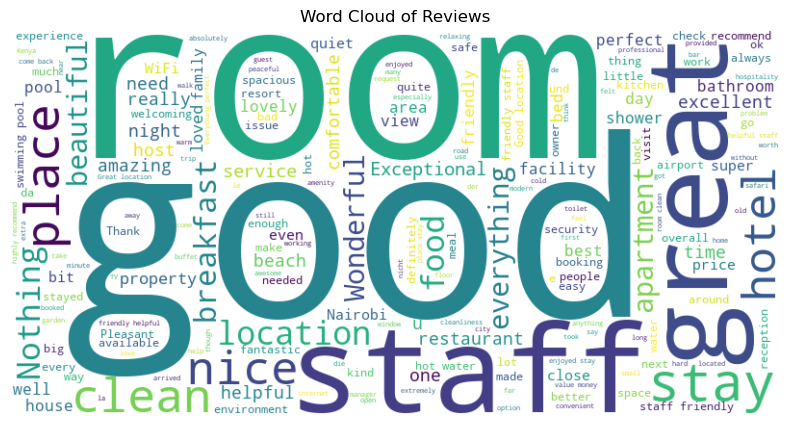

In [24]:

from wordcloud import WordCloud

# Generate a word cloud from processed reviews
text = " ".join(review for review in reviews_data["cleaned_combined_reviews"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

Generally, it seems that customers are satisfied by hotels in kenya with words like "good","great" , "nice", "staff" dominating the word cloud.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer to consider only bigrams
tfidfVectorizer_bigram = TfidfVectorizer(ngram_range=(2, 2))

# Fit and transform the documents
tfidf_matrix_bigram = tfidfVectorizer_bigram.fit_transform(reviews_data["cleaned_combined_reviews"])

# Convert the TF-IDF matrix to a DataFrame for easier viewing
tfidf_df_bigram = pd.DataFrame(tfidf_matrix_bigram[0].T.toarray(), index=tfidfVectorizer_bigram.get_feature_names_out(), columns = ["TF-IDF"])
tfidf_df_bigram.sort_values('TF-IDF', ascending=False)

,TF-IDF
room airport,0.396687
exceptional excellent,0.396687
service quality,0.396687
pick challenges,0.396687
quality room,0.374006
...,...
forget view,0.000000
forget hot,0.000000
forget day,0.000000
forget breakfast,0.000000


"Room airport", "exceptional excellent", "service quality", and "pick challenges" have the highest scores (0.3), suggesting they are uniquely important within the hotel and not frequently mentioned in other reviews.

High-scoring phrases like "exceptional excellent" and "service quality" highlight positive aspects of the review, indicating customer satisfaction

(-0.5, 399.5, 199.5, -0.5)

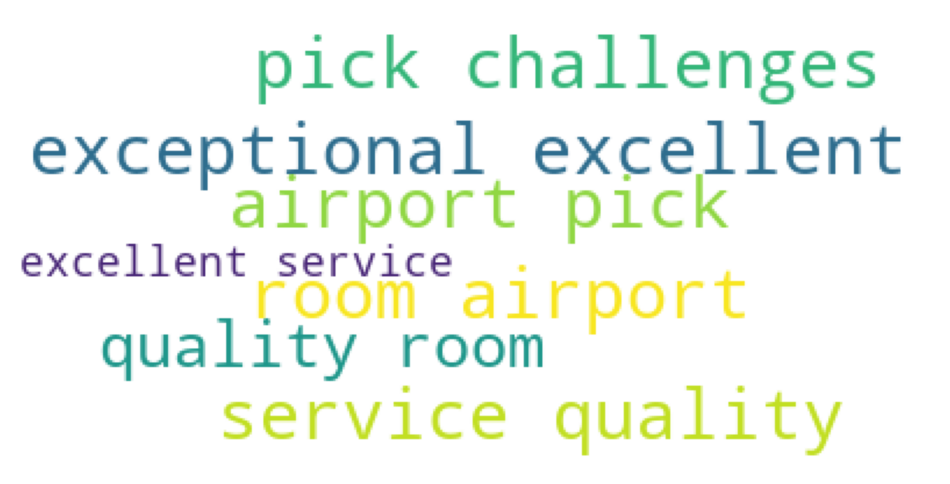

In [26]:
# Generate the word cloud using the bigram scores
wordcloud = WordCloud(max_font_size=40, relative_scaling=.1, background_color='white')
# NOTICE: here is .generate_from_frequencies() from the TFIDF scores (numbers)
wordcloud.generate_from_frequencies(tfidf_df_bigram["TF-IDF"])

# Display the word cloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')

## Sentiment Analysis

In [28]:
from textblob import TextBlob

for review in reviews_data["cleaned_combined_reviews"]:
    print(TextBlob(review).sentiment)

Sentiment(polarity=0.8333333333333333, subjectivity=1.0)
Sentiment(polarity=0.39999999999999997, subjectivity=0.4916666666666667)
Sentiment(polarity=0.45555555555555555, subjectivity=0.5)
Sentiment(polarity=0.59, subjectivity=0.66)
Sentiment(polarity=0.4916666666666667, subjectivity=0.8833333333333333)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.28079420579420583, subjectivity=0.5586455211455212)
Sentiment(polarity=0.5961904761904762, subjectivity=0.6157142857142858)
Sentiment(polarity=0.14273160173160168, subjectivity=0.32607359307359307)
Sentiment(polarity=0.5116666666666667, subjectivity=0.6833333333333332)
Sentiment(polarity=0.2944444444444444, subjectivity=0.6416666666666667)
Sentiment(polarity=0.278974358974359, subjectivity=0.5876923076923077)
Sentiment(polarity=0.14375, subjectivity=0.51875)
Sentiment(polarity=0.3790816326530612, subjectivity=0.6051020408163266)
Sentiment(polarity=0.21964285714285717, subjectivity=0.6328042328042327)
Sentiment(polarity=0.331,

In [29]:
reviews_data.head()

,hotel_pages,guest_names,guest_countries,room_types,ratings,review_dates,review_main_texts,review_like_texts,review_dislike_texts,combined_reviews,cleaned_combined_reviews,Nouns_adjs
0,https://www.booking.com/hotel/ke/argyle-grand-...,Tony,Kenya,Superior Double Room,8.7,2024-11-15,Exceptional,"Excellent services, quality room",Airport Pick up Challenges,"Exceptional Excellent services, quality room A...",Exceptional Excellent service quality room Air...,Exceptional Excellent service quality room Air...
1,https://www.booking.com/hotel/ke/argyle-grand-...,Christopher,United Kingdom,Superior Double Room,8.7,2024-11-02,Good value for your money,Staff are so outstanding. Second time staying ...,Nothing.,Good value for your money Staff are so outstan...,Good value money Staff outstanding Second time...,Good value money Staff outstanding Second time...
2,https://www.booking.com/hotel/ke/argyle-grand-...,Annelisa,South Africa,Superior Double Room,8.7,2024-10-07,One of the best and clean!!,Restaurants,Concierge service not open 24.7,One of the best and clean!! Restaurants Concie...,One best clean Restaurants Concierge service o...,One best clean Restaurants Concierge service o...
3,https://www.booking.com/hotel/ke/argyle-grand-...,Edward,United Arab Emirates,Superior Double Room,8.7,2024-09-26,Wonderful,Cleanness and service was good,The restaurants are only at the ground level n...,Wonderful Cleanness and service was good The r...,Wonderful Cleanness service good The restauran...,Wonderful Cleanness service good The restauran...
4,https://www.booking.com/hotel/ke/argyle-grand-...,Ntefeleng,Lesotho,Superior Double Room,8.7,2024-09-10,Gorgeous hotel,the welcome message on the TV screen with my n...,Airconditioner couldn't warm the room at night...,Gorgeous hotel the welcome message on the TV s...,Gorgeous hotel welcome message TV screen name ...,Gorgeous hotel welcome message TV screen name ...


In [30]:
# calculate the polarity and subjectivity
for index, cleaned_review in enumerate(reviews_data["cleaned_combined_reviews"]):
    
    # upack the two scores from tuples
    polarity_Blob = TextBlob(cleaned_review).sentiment.polarity
    subjectivity_Blob = TextBlob(cleaned_review).sentiment.subjectivity
    
    reviews_data.loc[index,'Polarity_Blob'] = polarity_Blob
    reviews_data.loc[index,'Subjectivity_Blob'] = subjectivity_Blob

reviews_data.head()

,hotel_pages,guest_names,guest_countries,room_types,ratings,review_dates,review_main_texts,review_like_texts,review_dislike_texts,combined_reviews,cleaned_combined_reviews,Nouns_adjs,Polarity_Blob,Subjectivity_Blob
0,https://www.booking.com/hotel/ke/argyle-grand-...,Tony,Kenya,Superior Double Room,8.7,2024-11-15,Exceptional,"Excellent services, quality room",Airport Pick up Challenges,"Exceptional Excellent services, quality room A...",Exceptional Excellent service quality room Air...,Exceptional Excellent service quality room Air...,0.833333,1.000000
1,https://www.booking.com/hotel/ke/argyle-grand-...,Christopher,United Kingdom,Superior Double Room,8.7,2024-11-02,Good value for your money,Staff are so outstanding. Second time staying ...,Nothing.,Good value for your money Staff are so outstan...,Good value money Staff outstanding Second time...,Good value money Staff outstanding Second time...,0.400000,0.491667
2,https://www.booking.com/hotel/ke/argyle-grand-...,Annelisa,South Africa,Superior Double Room,8.7,2024-10-07,One of the best and clean!!,Restaurants,Concierge service not open 24.7,One of the best and clean!! Restaurants Concie...,One best clean Restaurants Concierge service o...,One best clean Restaurants Concierge service o...,0.455556,0.500000
3,https://www.booking.com/hotel/ke/argyle-grand-...,Edward,United Arab Emirates,Superior Double Room,8.7,2024-09-26,Wonderful,Cleanness and service was good,The restaurants are only at the ground level n...,Wonderful Cleanness and service was good The r...,Wonderful Cleanness service good The restauran...,Wonderful Cleanness service good The restauran...,0.590000,0.660000
4,https://www.booking.com/hotel/ke/argyle-grand-...,Ntefeleng,Lesotho,Superior Double Room,8.7,2024-09-10,Gorgeous hotel,the welcome message on the TV screen with my n...,Airconditioner couldn't warm the room at night...,Gorgeous hotel the welcome message on the TV s...,Gorgeous hotel welcome message TV screen name ...,Gorgeous hotel welcome message TV screen name ...,0.491667,0.883333


In [31]:
# convert to numeric

reviews_data["ratings"] = pd.to_numeric(reviews_data["ratings"])

In [32]:
reviews_data["ratings"].unique()

array([8.7, 8.5, 8.4, 9.5, 8.6, 9.6, 8. , 8.2, 8.1, 8.3, 7.2, 8.9, 9. ,
       7.6, 7.5, 9.1, 9.2, 7.9, 7.8, 7.4, 8.8, 9.3, 9.4, 7.7, 6.8, 6.6,
       6.9, 7.1, 7.3, 7. , 6. , 5.9, 6.5, 9.7, 6.7, 5.7, 6.3, 6.4])

In [35]:
reviews_data["ratings"].mean()

8.209060022650057

In [34]:
reviews_data["ratings"].max()

9.7

In [33]:
reviews_data["ratings"].min()


5.7

In [36]:
# grab the reviews having positive polarities but low ratings
pd.set_option('display.max_colwidth', None)

postive_low = reviews_data[(reviews_data["Polarity_Blob"] > 0) & (reviews_data["ratings"]<= 6.0)]
postive_low[["cleaned_combined_reviews", "ratings", "Polarity_Blob", "Subjectivity_Blob"]]

,cleaned_combined_reviews,ratings,Polarity_Blob,Subjectivity_Blob
310,Good Amazing host grat service The room facility like towel dustbin,6.0,0.65,0.75
337,It good Overall cleanliness facility The facility water bathroom,5.9,0.35,0.30


In [37]:
# grab the reviews having negative polarities but high ratings
negative_high = reviews_data[(reviews_data["Polarity_Blob"] < -0.1) & (reviews_data["ratings"] >= 6.0)]
negative_high[["cleaned_combined_reviews", "ratings", "Polarity_Blob", "Subjectivity_Blob"]]

,cleaned_combined_reviews,ratings,Polarity_Blob,Subjectivity_Blob
16,Customer care prioritised Location overly expensive,8.7,-0.500000,0.700000
17,Dissapointing Not much Room bathroom area layout poor cramped TV system complicated user info No service directory room service menu Will go,8.7,-0.333333,0.600000
200,okay stay The pillow comfortable The bathroom mess The room I paid premium price yet shower cold broken tap Very disappointed Asked help response staff reported issue checking staff bothered issue,8.5,-0.208333,0.641667
251,Terrible No value money Location good Very average food quality Property run,7.6,-0.165000,0.706667
256,Not worth money Beach location room Food Entertainment,7.6,-0.150000,0.100000
260,Bien Ampi spazi disposizione e posizione eccellente n cessite un rafraichissement surtout au niveau de party commune Chambre ok mais terrible odeur de moissi,7.6,-0.250000,0.750000
269,F r ein 4 Sterne Hotel zu wenig stark die Jahre gekommen frukost lig maten lite f r likt varje kv Maten och st dningen,7.6,-0.200000,0.600000
352,Absolutely coming back Food swimming pool view ocean eating The facility room could better The toilet flush badly You flush long using lot water Please replace toilet room water saving possibility The curtain darken room transparent The reception TV channel extremely bad Do something otherwise remove television room,7.8,-0.102083,0.391667
665,Not good Location Staff attitude chasing client 9am literally,7.7,-0.350000,0.600000
704,Disappointing Alt Ingen ting klage p,7.9,-0.600000,0.700000


In [38]:
# grab the reviews having relatively neutral polarities 

neutral = reviews_data[(reviews_data["Polarity_Blob"] >= -0.1) & (reviews_data["Polarity_Blob"] <= 0)]
neutral[["cleaned_combined_reviews", "ratings", "Polarity_Blob", "Subjectivity_Blob"]]

,cleaned_combined_reviews,ratings,Polarity_Blob,Subjectivity_Blob
27,,8.5,0.000000,0.000000
37,,8.5,0.000000,0.000000
55,,7.5,0.000000,0.000000
74,,8.5,0.000000,0.000000
87,,8.4,0.000000,0.000000
90,,8.5,0.000000,0.000000
102,,9.2,0.000000,0.000000
124,Bad Very convenient shopping mall easy access The host helpful need refresh paint,7.8,-0.022222,0.600000
137,,9.1,0.000000,0.000000
139,Disappointing I like even late arrival host still waited upto late I arrived Nothing great,7.6,-0.100000,0.662500


### Lexicon


In [50]:
#Bing-Liu lexicon (positive word list & negative word list)
BLpositive_words = open('/Users/tiruskimani/MSDATA/SocialMedia Analytics/Bing_liu_negative.txt', "r").read().splitlines()
BLnegative_words = open('/Users/tiruskimani/MSDATA/SocialMedia Analytics/Bing_liu_positive.txt', "r").read().splitlines()
print("The number of positive words:", len(BLpositive_words))
print("The number of negative words:", len(BLnegative_words))

The number of positive words: 4783
The number of negative words: 2006


In [41]:
reviews_data["cleaned_combined_reviews"].head()

0                                                                                                          Exceptional Excellent service quality room Airport Pick Challenges
1                                                                                                        Good value money Staff outstanding Second time staying hotel Nothing
2                                                                                                                      One best clean Restaurants Concierge service open 24 7
3                                                  Wonderful Cleanness service good The restaurant ground level restaurant high level bathtub room suite observation deck top
4    Gorgeous hotel welcome message TV screen name view garden room amazing lighting garden evening beautiful sight Airconditioner warm room night morning It set cold matter
Name: cleaned_combined_reviews, dtype: object

In [62]:
# identify the sentiment and save the values to a column

def sentiment(sentence):
    positive = 0
    negative = 0
    
    # Tokenize the sentence into words
    words = sentence.split()
    
    for word in words:
        if word in BLpositive_words:  # Check in Bing-Liu positive lexicon
            positive += 1
        elif word in BLnegative_words:  # Check in Bing-Liu negative lexicon
            negative += 1
    
    # Calculate sentiment score
    sentiment_score = positive - negative
    
    # Determine sentiment polarity
    if sentiment_score > 0:
        return "Negative"
    elif sentiment_score == 0:
        return "Neutral"
    else:
        return "Positive"

# Apply the function to update the sentiment column
reviews_data["sentiment"] = reviews_data["cleaned_combined_reviews"].apply(
    lambda x: sentiment(x)
)

In [67]:
reviews_data["sentiment"] = reviews_data["cleaned_combined_reviews"].apply(sentiment)
reviews_data.head()

,hotel_pages,guest_names,guest_countries,room_types,ratings,review_dates,review_main_texts,review_like_texts,review_dislike_texts,combined_reviews,cleaned_combined_reviews,Nouns_adjs,Polarity_Blob,Subjectivity_Blob,sentiment
0,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Tony,Kenya,Superior Double Room,8.7,2024-11-15,Exceptional,"Excellent services, quality room",Airport Pick up Challenges,"Exceptional Excellent services, quality room Airport Pick up Challenges",Exceptional Excellent service quality room Airport Pick Challenges,Exceptional Excellent service quality room Airport Pick Challenges,0.833333,1.000000,Neutral
1,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Christopher,United Kingdom,Superior Double Room,8.7,2024-11-02,Good value for your money,Staff are so outstanding. Second time staying at this hotel.,Nothing.,Good value for your money Staff are so outstanding. Second time staying at this hotel. Nothing.,Good value money Staff outstanding Second time staying hotel Nothing,Good value money Staff outstanding Second time staying hotel Nothing,0.400000,0.491667,Positive
2,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Annelisa,South Africa,Superior Double Room,8.7,2024-10-07,One of the best and clean!!,Restaurants,Concierge service not open 24.7,One of the best and clean!! Restaurants Concierge service not open 24.7,One best clean Restaurants Concierge service open 24 7,One best clean Restaurants Concierge service open 24 7,0.455556,0.500000,Positive
3,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Edward,United Arab Emirates,Superior Double Room,8.7,2024-09-26,Wonderful,Cleanness and service was good,"The restaurants are only at the ground level no restaurant at the high level ,no bathtub in rooms only in suites ,there should observation deck at the top","Wonderful Cleanness and service was good The restaurants are only at the ground level no restaurant at the high level ,no bathtub in rooms only in suites ,there should observation deck at the top",Wonderful Cleanness service good The restaurant ground level restaurant high level bathtub room suite observation deck top,Wonderful Cleanness service good The restaurant ground lev

In [64]:
reviews_data["sentiment"].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [65]:
sentiment_counts = reviews_data.groupby("sentiment")["sentiment"].count()

# Display the sentiment counts
print("Number of reviews by sentiment:")
print(sentiment_counts)

Number of reviews by sentiment:
sentiment
Negative     37
Neutral     104
Positive    742
Name: sentiment, dtype: int64


In [71]:
negative_reviews = reviews_data[reviews_data["sentiment"] == "Negative"]

# Display the filtered DataFrame
print("Negative Sentiment Reviews:")
negative_reviews.head()

Negative Sentiment Reviews:


,hotel_pages,guest_names,guest_countries,room_types,ratings,review_dates,review_main_texts,review_like_texts,review_dislike_texts,combined_reviews,cleaned_combined_reviews,Nouns_adjs,Polarity_Blob,Subjectivity_Blob,sentiment
16,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Archibald,Kenya,Superior Double Room,8.7,2024-11-21,Customer care to be prioritised,Location,overly expensive,Customer care to be prioritised Location overly expensive,Customer care prioritised Location overly expensive,Customer care prioritised Location overly expensive,-0.500000,0.700000,Negative
17,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Anton,South Africa,Superior Double Room,8.7,2024-08-16,Dissapointing,Not much,"Room and bathroom area layout poor and cramped. TV system very complicated with no user info. No services directory, only room service menu. Will not go there again.","Dissapointing Not much Room and bathroom area layout poor and cramped. TV system very complicated with no user info. No services directory, only room service menu. Will not go there again.",Dissapointing Not much Room bathroom area layout poor cramped TV system complicated user info No service directory room service menu Will go,Dissapointing Not much Room bathroom area layout poor cramped TV system complicated user info No service directory room service menu Will go,-0.333333,0.600000,Negative
19,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Patrick,Kenya,Superior Double Room,8.7,2024-04-13,"Ok for one night close to the airport, but nothing more. Room service & restaurant catastrophic","They send me to a room with two single bed and I booked one double bed.they changed it after.\nUnprofessional staff in restaurant. They don't look at client in restaurant, they were just discussing with Chinese manager and not attending client. When I asked to talk to the Chinese manager to explain that it was difficult to call server to make a order, she could not understand and keep repeating let us know if there is a problem...Twice I was disturbed in the room without reason (like checking if everything is ok at 830am....) Once without knocking 😱and I was in my shower.",Sunday band - Hotel was more like a club and was very loud and extremely busy. Very hard to speak to each other. Pool was packed not enough sun loungers. Cocktails watered down apart from expresso martini which was AMAZING. Very expensive for just the room.,"Ok for one night close to the airport, but nothing more. Room service & restaurant catastrophic They send me to a room with two single bed and I booked one double bed.they changed it after.\nUnprofessional staff in restaur

In [74]:
neutral_reviews = reviews_data[reviews_data["sentiment"] == "Neutral"]

# Display the filtered DataFrame
print("Neutral Sentiment Reviews:")
neutral_reviews.head()

Neutral Sentiment Reviews:


,hotel_pages,guest_names,guest_countries,room_types,ratings,review_dates,review_main_texts,review_like_texts,review_dislike_texts,combined_reviews,cleaned_combined_reviews,Nouns_adjs,Polarity_Blob,Subjectivity_Blob,sentiment
0,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Tony,Kenya,Superior Double Room,8.7,2024-11-15,Exceptional,"Excellent services, quality room",Airport Pick up Challenges,"Exceptional Excellent services, quality room Airport Pick up Challenges",Exceptional Excellent service quality room Airport Pick Challenges,Exceptional Excellent service quality room Airport Pick Challenges,0.833333,1.000000,Neutral
10,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Yolanda,South Africa,Superior Double Room,8.7,2024-05-24,Exceptional,"From the outside I thought it looked OK, until I got to my room and it was just fantastic. Stunning place to stay.",That booking dot com is slow to advise the hotel of a booking.,"Exceptional From the outside I thought it looked OK, until I got to my room and it was just fantastic. Stunning place to stay. That booking dot com is slow to advise the hotel of a booking.",Exceptional From outside I thought looked OK I got room fantastic Stunning place stay That booking dot com slow advise hotel booking,Exceptional From outside I thought looked OK I got room fantastic Stunning place stay That booking dot com slow advise hotel booking,0.294444,0.641667,Neutral
26,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Mariia,Malta,Superior Double Room,8.7,2024-03-18,Very Good,Комфортные чистые номера,Очень долго обслуживают в ресторане,Very Good Комфортные чистые номера Очень долго обслуживают в ресторане,Very Good,Very Good,0.910000,0.780000,Neutral
27,https://www.booking.com/hotel/ke/the-hills-view.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=2&hapos=2&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Duncan,Iceland,Two-Bedroom Apartment,8.5,2024-06-19,Exceptional,"Beautiful space, well-equipped and clean. The host was accessible and quick to respond. Highly recommended!",NaN,,,,0.000000,0.000000,Neutral
37,https://www.booking.com/hotel/ke/severin-sea-lodge.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e

In [73]:
positive_reviews = reviews_data[reviews_data["sentiment"] == "Positive"]

# Display the filtered DataFrame
print("Positive Sentiment Reviews:")
positive_reviews.head()

Positive Sentiment Reviews:


,hotel_pages,guest_names,guest_countries,room_types,ratings,review_dates,review_main_texts,review_like_texts,review_dislike_texts,combined_reviews,cleaned_combined_reviews,Nouns_adjs,Polarity_Blob,Subjectivity_Blob,sentiment
1,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Christopher,United Kingdom,Superior Double Room,8.7,2024-11-02,Good value for your money,Staff are so outstanding. Second time staying at this hotel.,Nothing.,Good value for your money Staff are so outstanding. Second time staying at this hotel. Nothing.,Good value money Staff outstanding Second time staying hotel Nothing,Good value money Staff outstanding Second time staying hotel Nothing,0.400000,0.491667,Positive
2,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Annelisa,South Africa,Superior Double Room,8.7,2024-10-07,One of the best and clean!!,Restaurants,Concierge service not open 24.7,One of the best and clean!! Restaurants Concierge service not open 24.7,One best clean Restaurants Concierge service open 24 7,One best clean Restaurants Concierge service open 24 7,0.455556,0.500000,Positive
3,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Edward,United Arab Emirates,Superior Double Room,8.7,2024-09-26,Wonderful,Cleanness and service was good,"The restaurants are only at the ground level no restaurant at the high level ,no bathtub in rooms only in suites ,there should observation deck at the top","Wonderful Cleanness and service was good The restaurants are only at the ground level no restaurant at the high level ,no bathtub in rooms only in suites ,there should observation deck at the top",Wonderful Cleanness service good The restaurant ground level restaurant high level bathtub room suite observation deck top,Wonderful Cleanness service good The restaurant ground level restaurant high level bathtub room suite observation deck top,0.590000,0.660000,Positive
4,https://www.booking.com/hotel/ke/argyle-grand-nairobi-airport.html?label=ke-LFfhBSw4T_FF2OFgDbPUYwS626067111553%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-818396892213%3Alp9023960%3Ali9073682%3Adec%3Adm&sid=207fc6f8c794a19e2772fd43afe7e381&aid=1591996&ucfs=1&arphpl=1&dest_id=109&dest_type=country&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=5aba4cc25dd1009a&srepoch=1731673252&from_sustainable_property_sr=1&from=searchresults,Ntefeleng,Lesotho,Superior Double Room,8.7,2024-09-10,Gorgeous hotel,the welcome message on the TV screen with my name\nthe view of the garden from my room was amazing\nthe lighting in the garden in the evening was a beautiful sight,Airconditioner couldn't warm t

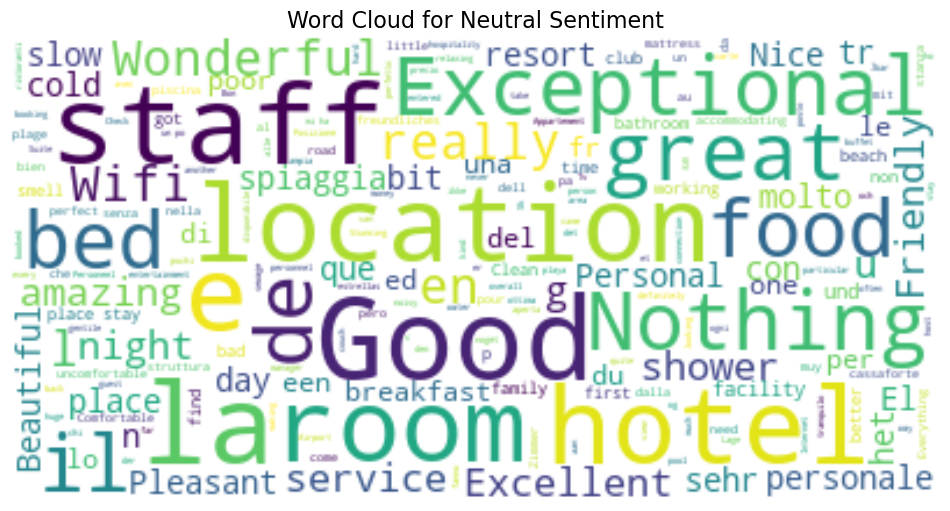

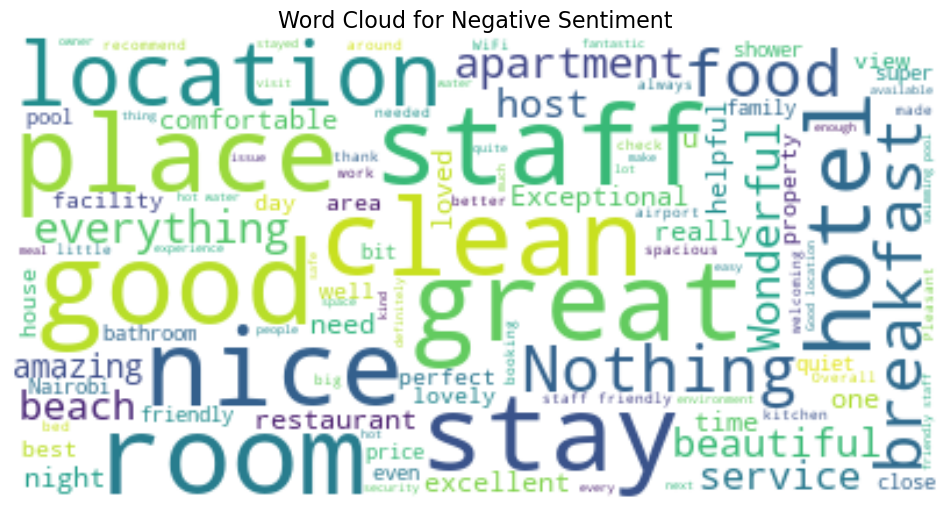

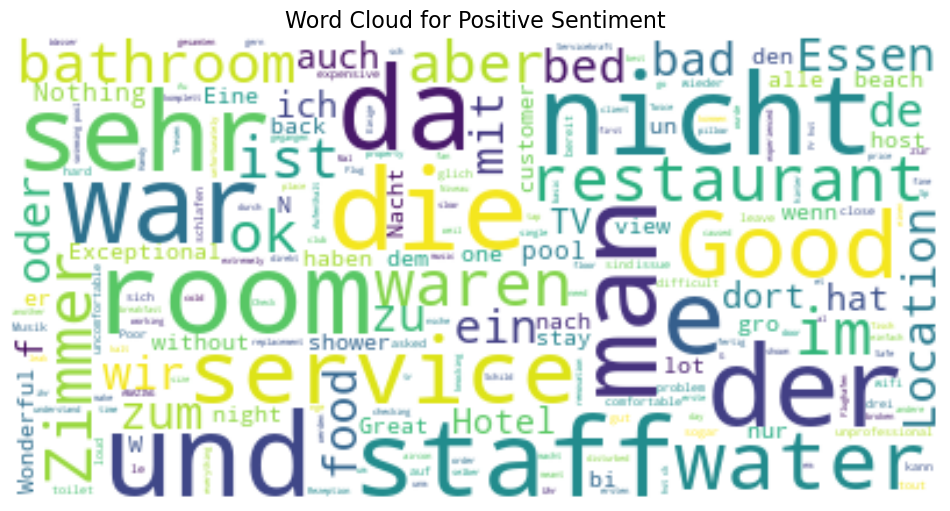

In [55]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# stopwords to remove
remove_words = []

# Generate word cloud maps for each sentiment
for sentiment in reviews_data["sentiment"].unique():
    # Filter reviews for specific sentiment
    sub_df = reviews_data[reviews_data["sentiment"] == sentiment]
    
    # Combine 
    merge_text = " ".join(
        sub_df["cleaned_combined_reviews"].apply(
            lambda x: " ".join([word for word in x.split() if word not in remove_words])
        )
    )
    
    # Generate 
    wordcloud = WordCloud(
        max_font_size=50,
        relative_scaling=0.1,
        background_color="white"
    ).generate(merge_text)

    # Display the generated word cloud
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {sentiment} Sentiment", fontsize=16)
    plt.axis("off")
    plt.show()


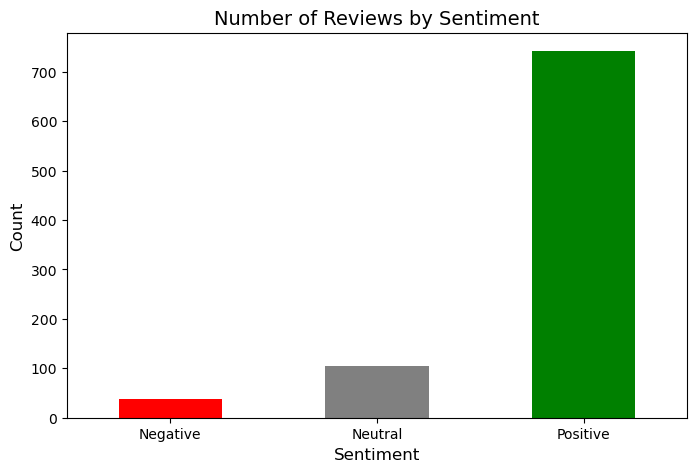

In [68]:
import matplotlib.pyplot as plt

# Plot the sentiment counts
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'], figsize=(8, 5))
plt.title("Number of Reviews by Sentiment", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [56]:
# Save data to a DataFrame or CSV
import pandas as pd
reviews_data.to_csv("hotel_reviews_sentiment_labeled.csv", index=False)

## Topic Modelling

In [78]:
# set up the evironments (we did this above but for the logical consistency)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation

# set the topic modeling model
# set n_components = 5
lda_model = make_pipeline(TfidfVectorizer(),
                         LatentDirichletAllocation(n_components = 5, # default value
                                                   random_state=0))

# train the model using unlabeled data
LDA_1 = lda_model.fit(reviews_data["cleaned_combined_reviews"])

# Get the LDA model and feature names
lda_1 = lda_model.named_steps['latentdirichletallocation']
tfidf_1 = lda_model.named_steps['tfidfvectorizer']
feature_names_2 = tfidf_1.get_feature_names_out()

# Get the top words for each topic
n_top_words = 5
topic_keywords_1 = {}

# grab the top n_top_words from each topic
# at the previous step, we set n_components = 10 (10 topics)
for topic_idx, topic in enumerate(lda_1.components_):
    
    # sort the topic words by the probabilities
    # the words having high probablities consider more importance
    # argsort() is going to ascending the words 
    top_features_idx = topic.argsort()[-n_top_words:][::-1]
    top_features = [feature_names_2[i] for i in top_features_idx]
    topic_keywords_1[f"Topic {topic_idx}"] = top_features

# Display the top words for each topic
print("Top 5 topics for corpus: 'reviews_data['cleaned_combined_reviews']' (top 5 words for each topic):\n")

for topic, keywords in topic_keywords_1.items():
    print(f"{topic}: {', '.join(keywords)}")

Top 5 topics for corpus: 'reviews_data['cleaned_combined_reviews']' (top 5 words for each topic):

Topic 0: peace, und, da, der, dear
Topic 1: the, good, staff, room, great
Topic 2: abit, la, tout, personalet, frokost
Topic 3: per, cleanness, lighting, attitude, selection
Topic 4: homely, sehr, und, feedback, break


Topics Interpretations

- **Topic 0** : This topic emphasizes on peacefulness and traquility suggesting that guests appreciate quit and serene environments for their stay

- **Topic 1** : This topic is generic and mostly captures positive sentiments towards the staff and room, suggesting service quality and good guest experience

- **Topic 2** : This topic reflects mixed feedback, suggesting some dissatisfaction or room for minor improvements needed (abit). there is some international feedback on breakfast (frokost), staff (personalet) showing that the feedback is mainly on dining and service quality.

- **Topic 3** : This topic emphasises the importance of hygene (cleanliness), room features (lighting,selection), and staff behavior (attitude).

- **Topic 4** : This topic focuses on the guests appreciation of warmth and comfort (homely)

Recommendations for Hoteliers:
- Maintain Strengths:
  - Continue providing a peaceful, homely, and customer-focused experience.
- Address Weaknesses:
    - Pay attention to cleanliness and ensure staff exhibit a welcoming and positive attitude.
- Embrace Multilingual Feedback:
    - Consider catering to international guests with multilingual services and menus.
- Enhance Dining Options:
    - Focus on improving breakfast and meal selection to cater to diverse preferences.

## Data Analysis

#### 1. Which Hotel Features Receive the Most Positive Feedback?

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

# Filter positive reviews
positive_reviews = reviews_data[reviews_data["sentiment"] == "Positive"]["cleaned_combined_reviews"]

# Vectorize the positive reviews to extract frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 features
X = vectorizer.fit_transform(positive_reviews)

# Get the top features
positive_features = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
).sum().sort_values(ascending=False)

print("Top hotel features receiving the most positive feedback:")
print(positive_features)


Top hotel features receiving the most positive feedback:
good           432
staff          389
room           326
great          279
stay           264
clean          239
place          231
location       213
nice           180
friendly       176
food           161
hotel          151
breakfast      143
helpful        133
wonderful      124
apartment      120
comfortable    116
beach          115
service        115
beautiful      111
dtype: int64


### 2. What Are the Most Common Complaints Among Guests?

In [80]:
# Filter negative reviews
negative_reviews = reviews_data[reviews_data["sentiment"] == "Negative"]["cleaned_combined_reviews"]

# Vectorize the negative reviews to extract frequent words
X_neg = vectorizer.fit_transform(negative_reviews)

# Get the top features for negative reviews
negative_features = pd.DataFrame(
    X_neg.toarray(),
    columns=vectorizer.get_feature_names_out()
).sum().sort_values(ascending=False)

print("Most common complaints among guests:")
print(negative_features)

Most common complaints among guests:
room          24
und           23
die           18
da            17
man           17
nicht         17
der           17
war           15
staff         12
sehr          11
service       10
good          10
water         10
restaurant     9
im             9
waren          9
mit            8
wir            8
zimmer         8
zum            8
dtype: int64


### 3. Which Aspect of Hotel Service Has the Highest and Lowest Average Ratings?

In [84]:
# Group by service category and calculate average ratings
average_ratings = reviews_data.groupby("room_types")["ratings"].mean().sort_values()

print("Average ratings by hotel service room_type:")
print(average_ratings)

Average ratings by hotel service room_type:
room_types
King Suite with Ocean View                 6.3
Deluxe Double Room with Two Double Beds    6.6
Double or Twin Room with Sea View          6.9
Budget Single Room                         7.0
Suite                                      7.2
                                          ... 
Deluxe Tent with 1 King Bed                9.5
Queen Suite                                9.5
Family Room with Private Bathroom          9.5
Double Suites Full Board                   9.7
Bungalow - Water Front                     9.7
Name: ratings, Length: 208, dtype: float64


In [85]:
print("\nAspect with the highest average rating:")
print(average_ratings.idxmax(), "with a rating of", average_ratings.max())


Aspect with the highest average rating:
Double Suites Full Board with a rating of 9.7


In [86]:

print("\nAspect with the lowest average rating:")
print(average_ratings.idxmin(), "with a rating of", average_ratings.min())


Aspect with the lowest average rating:
King Suite with Ocean View with a rating of 6.3


### 4. Does Sentiment Vary Based on Hotel Rating?

In [88]:
# Group by star rating and sentiment
sentiment_by_rating = reviews_data.groupby(["ratings", "sentiment"]).size().unstack(fill_value=0)

print("Sentiment distribution by ratings:")
print(sentiment_by_rating)


Sentiment distribution by ratings:
sentiment  Negative  Neutral  Positive
ratings                               
5.7               0        1         0
5.9               0        0         1
6.0               0        0         1
6.3               1        0         0
6.4               0        0         1
6.5               0        0         1
6.6               0        0         1
6.7               0        0         3
6.8               0        0         4
6.9               0        0         8
7.0               0        1         8
7.1               0        1        10
7.2               0        3         9
7.3               0        1         7
7.4               0        2        20
7.5               0        3        18
7.6               9       14        59
7.7               3        2        39
7.8               9       14        57
7.9               1       13        61
8.0               1        2        24
8.1               0        5        20
8.2               0        1 

- Higher ratings (above 8.0) correlate strongly with positive sentiment, showing that guests are generally more satisfied with better-rated hotels.
- Neutral sentiment is prevalent in mid-range ratings (7.0 - 8.0), possibly reflecting mixed experiences.
- Negative sentiment is concentrated around ratings like 7.6 and 7.8, highlighting areas where service might not meet expectations.

### 5. How does sentiment vary by room type ?

In [89]:
# Group by review type and sentiment
sentiment_by_type = reviews_data.groupby(["room_types", "sentiment"]).size().unstack(fill_value=0)

print("Sentiment distribution by review type:")
print(sentiment_by_type)


Sentiment distribution by review type:
sentiment                   Negative  Neutral  Positive
room_types                                             
Apartment                          1        1         8
Apartment - Ground Floor           1        0         5
Apartment - Split Level            0        0         1
Apartment with Balcony             0        0         4
Apartment with Garden View         0        0         5
...                              ...      ...       ...
Two-Room Apartment                 0        0         1
Villa                              0        0         4
Villa with Garden View             0        0         1
Villa with Private Pool            0        0         1
Zebra tent                         0        0         1

[208 rows x 3 columns]


#### 6. Do guests from specific countries or regions express higher or lower satisfaction?


Average ratings by country:
guest_countries
Peru            9.500000
Kosovo          9.400000
Namibia         9.200000
Croatia         9.100000
Portugal        9.066667
                  ...   
Comoros         7.500000
Nepal           7.400000
Belarus         7.200000
Colombia        7.100000
Sierra Leone    7.100000
Name: ratings, Length: 94, dtype: float64


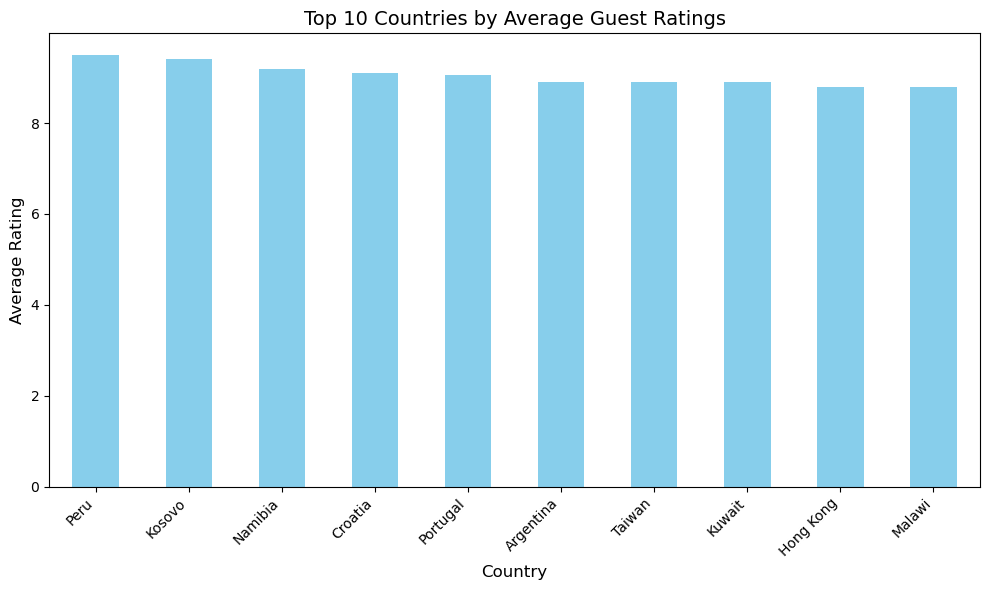


Sentiment distribution by country:
sentiment                 Negative  Neutral  Positive
guest_countries                                      
Argentina                        0        0         1
Australia                        0        0        13
Austria                          1        1         5
Bangladesh                       0        0         1
Belarus                          0        0         1
...                            ...      ...       ...
United Arab Emirates             0        1        19
United Kingdom                   4       11        67
United States of America         4       11        89
Zambia                           0        0         3
Zimbabwe                         1        0         3

[94 rows x 3 columns]


In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Group reviews by country and calculate average rating
country_ratings = reviews_data.groupby("guest_countries")["ratings"].mean().sort_values(ascending=False)

# Display average ratings by country
print("Average ratings by country:")
print(country_ratings)

# Optional: Visualize the average ratings by country
plt.figure(figsize=(10, 6))
country_ratings.head(10).plot(kind='bar', color='skyblue')  # Show top 10 countries
plt.title("Top 10 Countries by Average Guest Ratings", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Sentiment Analysis by Country
sentiment_by_country = reviews_data.groupby(["guest_countries", "sentiment"]).size().unstack(fill_value=0)

# Display sentiment distribution by country
print("\nSentiment distribution by country:")
print(sentiment_by_country)

